## Logistic Regression

### Exam 1b

1. Read train.csv and test.csv

In [1]:
import pandas as pd
import numpy as np
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
print(f'data shape = {train_df.shape}')

data shape = (3000, 10)


2. Split into 70% train, 20% validation and 10% test

In [2]:
from sklearn.model_selection import train_test_split

# Split into 70% train and 30% temporary
train_data, temp_data = train_test_split(train_df, test_size=0.3, random_state=42)

# Split the temporary set into 20% validation and 10% test
validation_data, test_data = train_test_split(temp_data, test_size=1/3, random_state=42)

print(f'training data shape = {train_data.shape}')
print(f'validation data shape = {validation_data.shape}')
print(f'test data shape = {test_data.shape}')

training data shape = (2100, 10)
validation data shape = (600, 10)
test data shape = (300, 10)


3. Pre-setup

In [3]:
# Initialize weights randomly for 9 features, the bias term will be included as w1
W = np.random.rand(10)

# Set hyperparameters
alpha = 0.01  # Learning rate
epsilon = 0.00001  # Convergence criterion
epochs = 10000  # Number of iterations over the entire dataset

In [4]:
# Separate features and target
features = train_data.iloc[:, :-1]  # all rows, all columns except the last one
target = train_data.iloc[:, -1]  # all rows, just the last column

# Number of samples
M = features.shape[0]

# Add a column of ones to the feature matrix to account for the bias term
X = np.hstack((np.ones((M, 1)), features.values))

# Target vector
y = target.values

# Verify the shapes of X and y
print("Shape of X:", X.shape)  # Should be (M, 10) including the bias term
print("Shape of y:", y.shape)  # Should be (M,)


Shape of X: (2100, 10)
Shape of y: (2100,)


In [5]:
# Sigmoid function definition
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function definition for logistic regression
def compute_cost(X, y, W):
    m = y.shape[0]
    h = sigmoid(np.dot(X, W))
    cost = -(1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

# Gradient descent function definition
def gradient_descent(X, y, W, alpha, epsilon, epochs):
    m = y.shape[0]
    cost_history = []  # Keep track of the cost every epoch for plotting/verification purposes

    for epoch in range(epochs):
        # Step 1: Calculate the hypothesis h using matrix multiplication
        h = sigmoid(np.dot(X, W))
        
        # Step 2: Calculate the error
        error = h - y
        
        # Step 3: Calculate the gradient using matrix multiplication
        gradient = np.dot(X.T, error) / m
        
        # Step 4: Update the weights using matrix subtraction and scalar multiplication
        W_old = W.copy()
        W = W - alpha * gradient
        
        # Optional: Save the cost to the history for later
        cost = compute_cost(X, y, W)
        cost_history.append(cost)
        
        # Step 5: Check for convergence (if the change in cost function is less than epsilon)
        if np.all(np.abs(W_old - W) < epsilon):
            print(f'Convergence reached at epoch: {epoch}')
            break
    
    return W, cost_history

# Perform gradient descent
W, cost_history = gradient_descent(X, y, W, alpha, epsilon, epochs)

# Output the final weights and cost
print("Final weights:", W)
print("Final cost:", cost_history[-1])


Final weights: [ 0.34270093  4.16573588 -1.65078691  0.29474555 -0.01692129  0.30600862
 -0.20283291  0.14317599  0.25493391  0.19826226]
Final cost: 0.23638427566091627


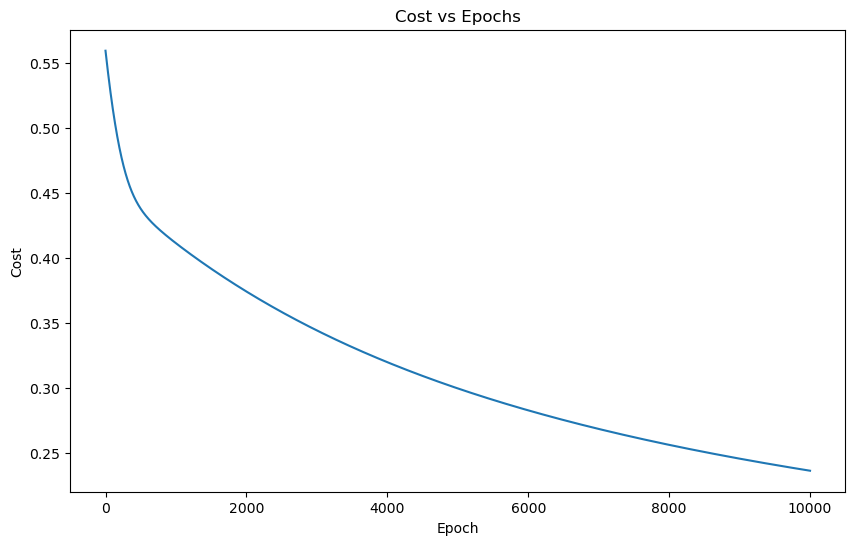

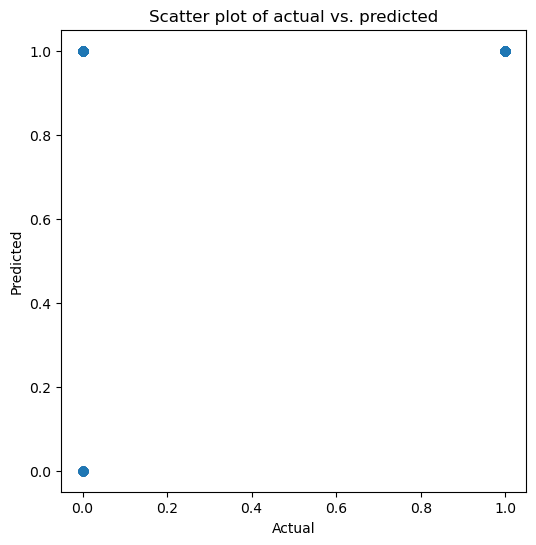

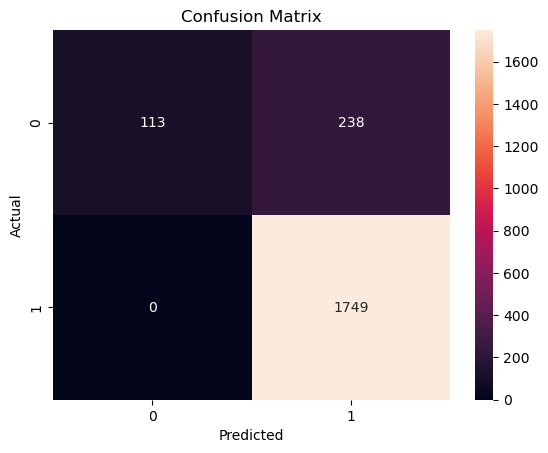

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming that 'W' are the weights after performing gradient descent,
# 'X' is the feature matrix, and 'y' is the true labels

# Calculate predictions
h = sigmoid(np.dot(X, W))

# Threshold the predictions to get binary class predictions
y_pred = h >= 0.5

# Convert y_pred to DataFrame
y_pred_df = pd.DataFrame(y_pred.astype(int), columns=['Predicted'])

# Save to CSV
y_pred_df.to_csv('y_pred.csv', index=False)

# Plot of cost vs epochs
plt.figure(figsize=(10, 6))
plt.plot(cost_history)
plt.title('Cost vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()

# Scatter plot of y_true vs y_pred
plt.figure(figsize=(6, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.title('Scatter plot of actual vs. predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# Confusion Matrix
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
